In [32]:
# !wget --no-check-certificate \
#   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#   -O cats_and_dogs_filtered.zip

In [33]:
# ! unzip cats_and_dogs_filtered.zip

In [34]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [35]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [38]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [39]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [40]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [41]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [42]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [43]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [44]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [45]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [46]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [47]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [48]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [49]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [50]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [51]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [52]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [53]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [54]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [55]:
model.add(Flatten())

In [56]:
model.add(Dense(units=4096,activation="relu"))

In [57]:
#model.add(Dense(units=4096,activation="relu"))

In [58]:
model.add(Dense(units=2, activation="softmax"))

In [59]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 256)      

In [61]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [62]:
hist = model.fit_generator(steps_per_epoch=5,generator=traindata, validation_data= testdata, validation_steps=5,epochs=1,callbacks=[checkpoint,early])

Epoch 1/1
5/5 [==============================] - 321s 64s/step - loss: 1581.2289 - accuracy: 0.5000 - val_loss: 0.7059 - val_accuracy: 0.5000


C:\Users\ven_n_000\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
C:\Users\ven_n_000\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


In [67]:
model.save("Catdog.h5")


In [68]:
# # import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title("model accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("Epoch")
# plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
# plt.show()

cat


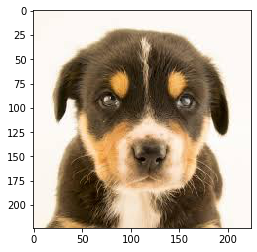

In [69]:
from keras.preprocessing import image
img = image.load_img("download (2).jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("CatDog.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

In [77]:
saved_model = load_model("CatDog.h5")

In [78]:
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 256)      

In [79]:
saved_model=saved_model-saved_model.layers.pop()

TypeError: unsupported operand type(s) for -: 'Sequential' and 'Dense'

In [ ]:
saved_model.summary()

In [84]:
model = load_model('CatDog.h5', custom_objects={'dense_4':'dense_4'})
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 256)      

In [85]:
model.layers.pop()

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 256)      

In [87]:
print(len(model.layers))  # "2"

model.pop()
print(len(model.layers))  # "1"

21
20


In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 256)      

C:\Users\ven_n_000\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [89]:
for layer in model.layers[:]:
        layer.trainable = False

In [90]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 256)      

In [91]:
model.add(Dense(units=3, activation="softmax"))

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 256)      

In [96]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 20 images belonging to 3 classes.
Found 10 images belonging to 3 classes.


In [97]:
hist = model.fit_generator(steps_per_epoch=5,generator=traindata, validation_data= testdata, validation_steps=5,epochs=1)

Epoch 1/1
5/5 [==============================] - 157s 31s/step - loss: 1.0952 - accuracy: 0.3600 - val_loss: 1.0861 - val_accuracy: 0.4000


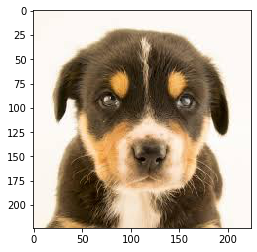

In [108]:
img = image.load_img("download (2).jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [109]:
output = model.predict(img)


In [110]:
output

array([[0.34460303, 0.3458102 , 0.30958676]], dtype=float32)

In [111]:
if output[0][0] > output[0][1]:
    if output[0][0]> output[0][2]:
        print("cat")
    else:
        print("bird")
else:
    if output[0][1]> output[0][2]:
        print("dog")
    else:
        print("bird")

dog


dog


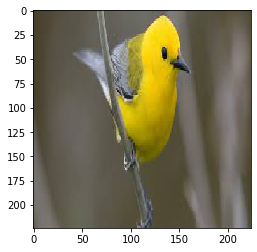

In [112]:
img = image.load_img("download.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
if output[0][0] > output[0][1]:
    if output[0][0]> output[0][2]:
        print("cat")
    else:
        print("bird")
else:
    if output[0][1]> output[0][2]:
        print("dog")
    else:
        print("bird")

In [113]:
output

array([[0.34076816, 0.3419856 , 0.31724623]], dtype=float32)